<a href="https://colab.research.google.com/github/Pratik94229/Time-Series/blob/main/Bitcoin_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [96]:
import pandas as pd
import io, os, sys, setuptools, tokenize
from prophet import Prophet
from matplotlib import pyplot as plt

In [97]:
series_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Module 4/BTC-USD (2).csv')

In [98]:
series_df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200


In [99]:
series_df.set_index('Date',inplace=True)

In [100]:
series_df.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700


<Axes: xlabel='Date'>

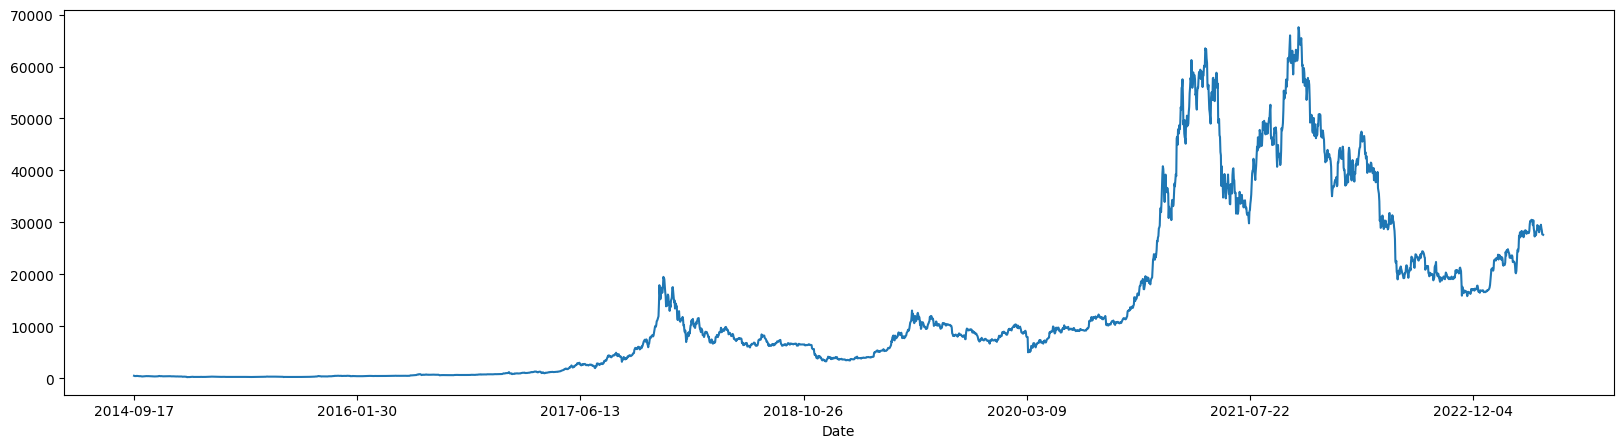

In [101]:
series_df['Close'].plot(figsize=(20,5))

In [102]:
df_copy=series_df.copy()

In [103]:
df_copy['Date']=df_copy.index

In [104]:
df_copy.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

In [105]:
series_fbp=df_copy[['ds','y']]

In [106]:
series_fbp.head(2)

,ds,y
Date,,
2014-09-17,2014-09-17,457.334015
2014-09-18,2014-09-18,424.440002


In [107]:
# fit the model
m = Prophet()
m.fit(series_fbp)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpczh1ty5b/cb7n2_x_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpczh1ty5b/n7awvd5c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61664', 'data', 'file=/tmp/tmpczh1ty5b/cb7n2_x_.json', 'init=/tmp/tmpczh1ty5b/n7awvd5c.json', 'output', 'file=/tmp/tmpczh1ty5b/prophet_model4oqv0er8/prophet_model-20230510135542.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:55:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:55:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [108]:
forecast.tail(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3513,2024-04-30,-6984.077844,-14401.105541,6322.440516,-16464.645851,2116.939829,2906.859528,2906.859528,2906.859528,0.350069,0.350069,0.350069,2906.509458,2906.509458,2906.509458,0.0,0.0,0.0,-4077.218316
3514,2024-05-01,-7042.004223,-15194.739451,7039.558191,-16573.915371,2089.704440,2838.497201,2838.497201,2838.497201,38.415539,38.415539,38.415539,2800.081662,2800.081662,2800.081662,0.0,0.0,0.0,-4203.507022
3515,2024-05-02,-7099.930601,-16244.468698,7502.056022,-16671.156622,2062.469051,2645.960922,2645.960922,2645.960922,-31.504993,-31.504993,-31.504993,2677.465915,2677.465915,2677.465915,0.0,0.0,0.0,-4453.969680
3516,2024-05-03,-7157.856980,-15900.082652,7236.247013,-16768.550165,2035.233662,2521.100505,2521.100505,2521.100505,-17.522863,-17.522863,-17.522863,2538.623368,2538.623368,2538.623368,0.0,0.0,0.0,-4636.756475
3517,2024-05-04,-7215.783359,-16165.160248,6446.578978,-16870.107076,2007.998273,2385.043632,2385.043632,2385.043632,1.200841,1.200841,1.200841,2383.842790,2383.842790,2383.842790,0.0,0.0,0.0,-4830.739728
3518,2024-05-05,-7273.709738,-16753.635814,6814.170510,-16989.619159,1980.762884,2212.073054,2212.073054,2212.073054,-1.668120,-1.668120,-1.668120,2213.741174,2213.741174,2213.741174,0.0,0.0,0.0,-5061.636684
3519,2024-05-06,-7331.636117,-17395.921818,6057.783431,-17090.112443,1953.527494,2039.985503,2039.985503,2039.985503,10.729528,10.729528,10.729528,2029.255975,2029.255975,2029.255975,0.0,0.0,0.0,-5291.650615
3520,2024-05-07,-7389.562496,-16612.555053,6142.844150,-17167.498352,1926.292105,1831.979225,1831.979225,1831.979225,0.350069,0.350069,0.350069,1831.629156,1831.629156,1831.629156,0.0,0.0,0.0,-5557.583271
3521,2024-05-08,-7447.488875,-16851.585555,5458.852323,-17269.226041,1899.056716,1660.799012,1660.799012,1660.799012,38.415539,38.415539,38.415539,1622.383473,1622.383473,1622.383473,0.0,0.0,0.0,-5786.689863
3522,2024-05-09,-7505.415254,-17937.334218,5240.197217,-17372.172055,1890.688333,1371.786614,1371.786614,1371.786614,-31.504993,-31.504993,-31.504993,1403.291607,1403.291607,1403.291607,0.0,0.0,0.0,-6133.628640


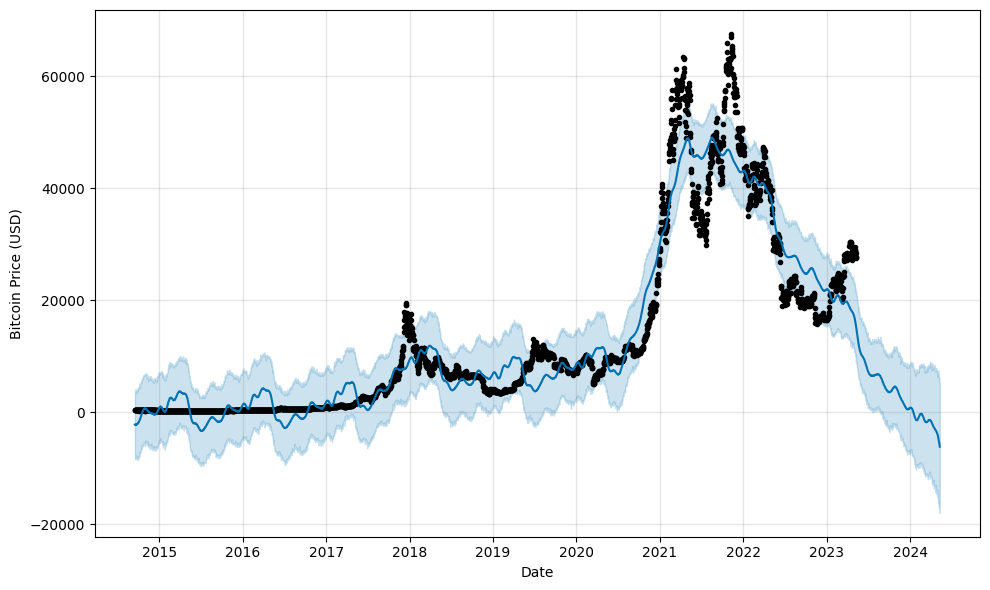

In [110]:
# plot the forecast
fig = m.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Bitcoin Price (USD)')
plt.show()

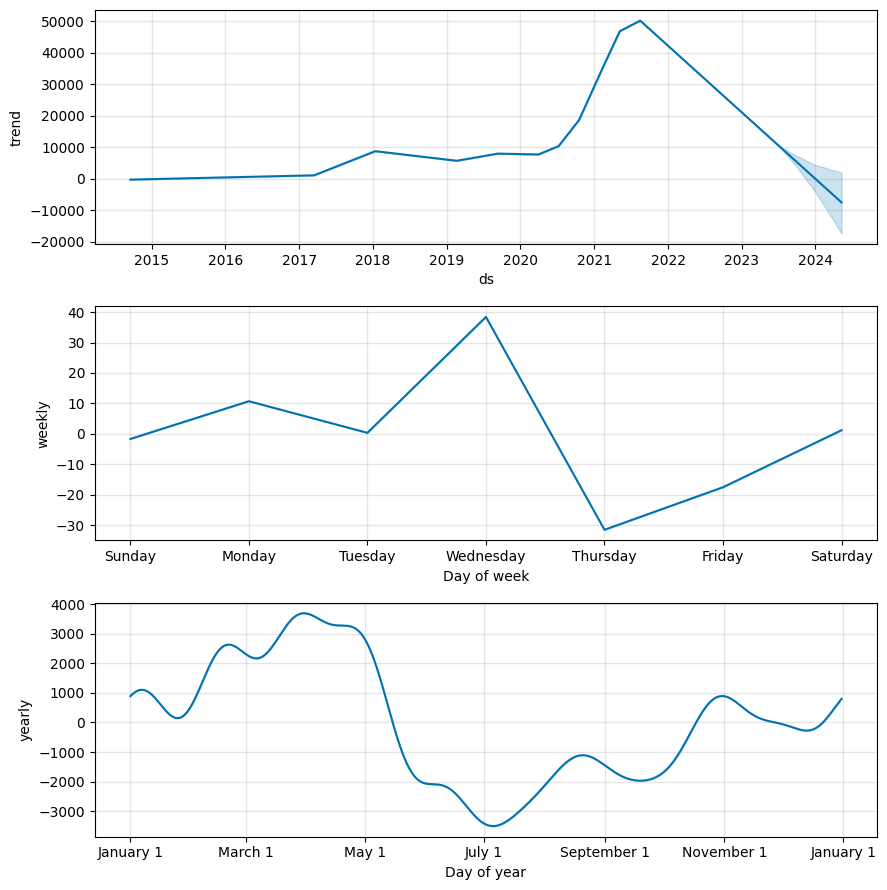

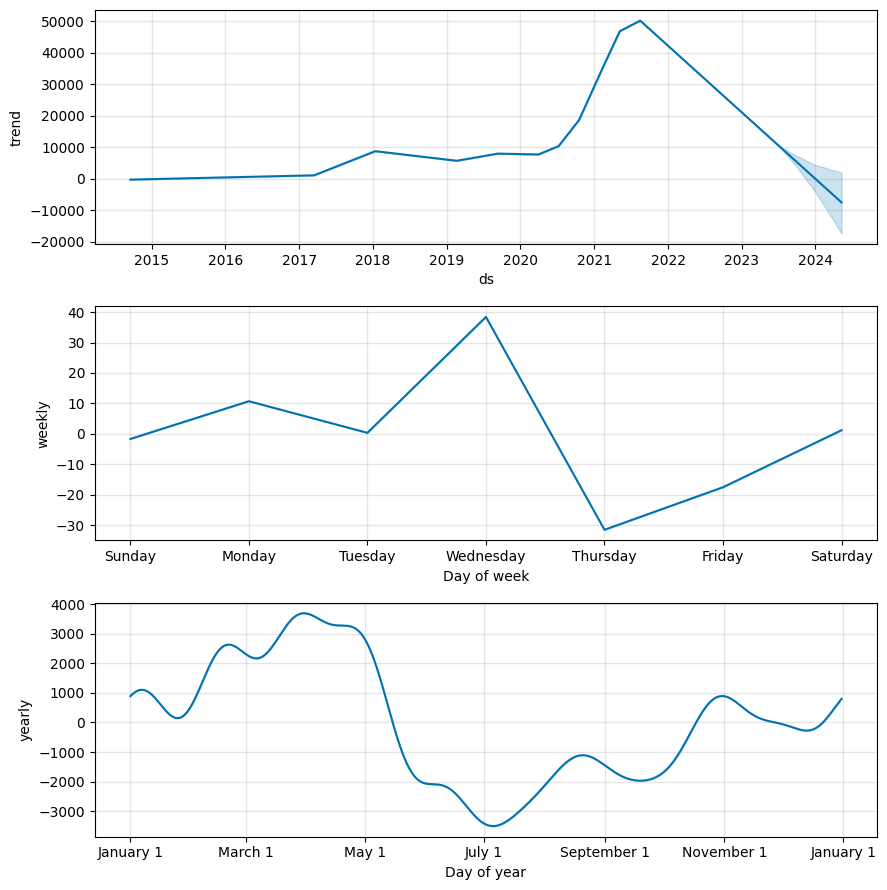

In [111]:
m.plot_components(forecast)

In [ ]:
# make future predictions
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

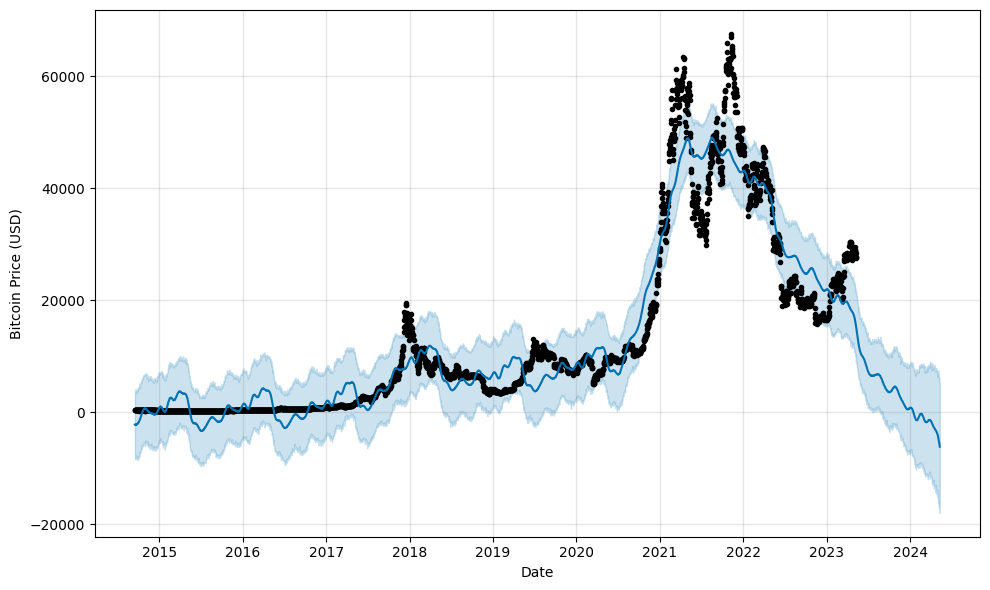

In [ ]:
# plot the forecast
fig = m.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Bitcoin Price (USD)')
plt.show()